CL
Descriptive_JobTitle
skills
primary skills
business_type
req_type
priority
Rec_Status
req_category
HSU
Assigned_HSU
rec_city
Rec_location
Metro_Area
req_id
exp_bill_rate
positions
Unresponded_Pos_Opcl
Unresponded_Pos_Hold
rejections
max submission
submissions
hits
hires
Sourced
Total_starts
Total_hires
Total_perm_hires
Total_perm_starts
BD
Fitting 5 folds for each of 5 candidates, totalling 25 fits
R-squared: 0.6513714317270756
Mean Absolute Error: 12.017354196797127
Mean Squared Error: 285.3698892051629
Root Mean Squared Error: 16.892894636656056
Mean Absolute Error: 12.02 degrees.
Accuracy: 85.33 %.


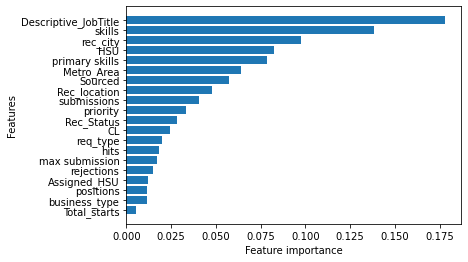

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("//Users/hareeshathippaih/Downloads/Updated_Billrate")
df_train = pd.read_csv('df.csv')
df_train=df_train.query('40 <= exp_bill_rate <= 200')
# df_train.shape
import warnings
warnings.filterwarnings("ignore")
cols_to_remove = ['ActSUB','ActHITS','offshore','2 sub client',
#                   'rec_name','received','Week Number','client_name',
#                   'sales_rep','recruiter',
                  'job_title','Rec_Post','rec_region',
#                   'Rec_location',
                  'DM','Business_manager','Delivery_Director','NAM','BU','ES',
                 'REC_Status_Reason','Client_Region',
#                   'rec_city',
                  'manager',
                  'FirstSubmissionResponseTimeInHours','FirstInterviewResponseTimeInHours',
                  'bucket',
                  'Created On','Rec_Qualification','sec_rtr','NSO','ESG_Vertical',
                  'ESG_Industry','ESG_DNA',
                  'ESG_NAM1','ESG_NAM2','ESG_NAM3','ESG_SAM','ESG_ES','ESG_BU','sourcer',
                  'submitted_on','created_by','Secondsubmitted_on',
                'Submitted_By','RTR_DM','Total_GP','Total_GPM','total_br','cust_category',
                  'new_buck','clienttype',
                  'ITSS','isbulk','jump','projtype','practype','DTCUChoice1','SubCat','client_code',
                  'division',
                  'divstart_date','divend_date','req_division',
                  'FirstClient_Submission_onResponseTimeInHours',
                  'Client_Submission_on','projectname','project_status','DTCU Calculated',
                  'projecttype','Practice_Tower','TotalContractNumber','Billing_Type','billingstatus',
                  'NoOfPositions','Delivery_Model','ProjectDescription','ProjectDurationMonths',
                  'ProjectDurationWeeks',
                  'receiveddate','StartDate','EndDate','ClientName','ClientLocation','lob',
                  'ITSS_Region','ManagerName',
                  'ManagerTitle','MSBusinessDevelopmentManager','MSEngagementManager',
                  'CollaberaProjectLead',
                  'RegionalAM','DeliveryManager','AssignmentRegion','India_Starts',
                  'RegionGroup','client_Markup',
                  'ActSUB','ActHITS','offshore','Outlier_want_to_exclude','DTCUChoice12',
                  'SubCat2','Period','2 sub client','Weekend','Column1','JD']
                 
df_train.drop(cols_to_remove, axis=1, inplace=True)


df_train.to_csv("clean.csv",index=False)
df1 = df_train.copy()

# Check for string label 
for label,content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
# Check for numerical label
for label,content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
        
# This will turn all of the string value into category values
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()
        
# Filling missing values
for label,content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_train[label+"is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        df_train[label] = pd.Categorical(content).codes+1
        
# ms = df_train["exp_bill_rate"][:10].plot.barh(figsize=(15,10))
# df_train["exp_bill_rate"].hist()

# For more security,copy the train set
df_tmp = df_train.copy()

# Split the data into X & y
X = df_tmp.drop(["exp_bill_rate","req_id"],axis=1)
y = df_tmp["exp_bill_rate"]

# X = df_train
# y = df_train["exp_bill_rate"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


# # Let's build a machine learning model 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# model = RandomForestRegressor(n_jobs=-1)
# model.fit(X_train,y_train)

# # Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

X_test.to_csv("data2.csv",index=False)
# Evaluate model using mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds_0 = model.predict(X_test)
mae_rf = mean_absolute_error(y_test,y_preds_0)
mae_rf

from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
grid = {
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples":[10000,12000,15000,20000]
}
rs_model = RandomizedSearchCV(
RandomForestRegressor(n_jobs=-1,
                     random_state=42),
                    param_distributions = grid,
                     n_iter=5,
                    cv=5,
                    verbose=True)
rs_model.fit(X_train,y_train)

score = rs_model.score(X_train,y_train)
print("R-squared:", score)
rs_model.best_params_

# Choose the best performance
y_preds_rs = rs_model.predict(X_test)
mae_hyp = mean_absolute_error(y_test,y_preds_rs)
mae_hyp,mae_rf

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_preds_rs))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_preds_rs))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_preds_rs)))

errors = abs(y_preds_rs - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


df_test = pd.read_csv('data2.csv')
y_preds = model.predict(df_test)
X_train1 = pd.DataFrame(y_test)
X_train1.columns=['Actual_billrate']
y_preds1 = pd.DataFrame(y_preds)
y_preds1.columns=['predicted_billrate']
X_train1.to_csv('Actual.csv',index=False)
y_preds1.to_csv('Predicted.csv',index=False)

Actual = pd.read_csv('Actual.csv')
Predicted = pd.read_csv('Predicted.csv')
det = pd.concat([Actual, Predicted], join = 'outer', axis = 1)
det2 = pd.concat([df_test, det], join = 'outer', axis = 1)
det2.to_csv('final1.csv',index=False)
raw_test = pd.read_csv('raw_test.csv')
det3 = pd.concat([raw_test, det], join = 'outer', axis = 1)
selection = det3[['Descriptive_JobTitle','CL','skills','rec_city','Rec_location','Actual_billrate','predicted_billrate']]
selection.to_csv('final2.csv',index=False)

# Find feature importance of our best model
model.feature_importances_
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
    
plot_features(X_train.columns,model.feature_importances_)

import pickle
# # open a file, where you ant to store the data
# file = open('model.pkl', 'wb')

# # dump information to that file
# pickle.dump(rs_model, file)


random_forest_pkl_filename = 'random_forest_regressor.pkl'
# Open the file to save as pkl file
random_forest_model_pkl = open(random_forest_pkl_filename, 'wb')
pickle.dump(rs_model, random_forest_model_pkl)
# Close the pickle instances
random_forest_model_pkl.close()